## Tensorflow依赖的Numpy和Pandas和Matplotlib和Sklearn介绍

* Numpy：支持多维数组与矩阵运算，针对数组运算提供大量的数学函数库
* Pandas：基于NumPy 的一种工具，快速便捷地处理表格类数据、数据分析任务
* Matplotlib：Python 的绘图库，可与 NumPy 一起使用，提供了一种有效的 MatLab 开源替代方案
* Sklearn (scikit-learn)：基于 Python 语言的机器学习、数据挖掘、数据分析工具，建立在 NumPy,SciPy 和 matplotlib 上

### 1. Numpy

In [1]:
import numpy as np

In [2]:
arr = np.arange(12).reshape(3, 4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [3]:
arr.shape

(3, 4)

In [4]:
arr.ndim

2

In [5]:
# 筛选行
arr[1:3]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
# 筛选列
arr[:, 1:3]

array([[ 1,  2],
       [ 5,  6],
       [ 9, 10]])

In [7]:
# 基础运算
arr + 3

array([[ 3,  4,  5,  6],
       [ 7,  8,  9, 10],
       [11, 12, 13, 14]])

In [8]:
# 数组乘法
weights = np.array([0.1, 0.2, 0.3, 0.4])
np.matmul(arr, weights)

array([ 2.,  6., 10.])

### 2. Pandas

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv("./datas/titanic/train.csv")
df.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [11]:
# 基本属性，形状
df.shape

(627, 10)

In [12]:
# 字段列表说明
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    int64  
 1   sex                 627 non-null    object 
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               627 non-null    int64  
 5   fare                627 non-null    float64
 6   class               627 non-null    object 
 7   deck                627 non-null    object 
 8   embark_town         627 non-null    object 
 9   alone               627 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 49.1+ KB


In [13]:
# 筛选
df[df["sex"] == "male"].head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
5,0,male,2.0,3,1,21.0750,Third,unknown,Southampton,n
9,0,male,20.0,0,0,8.0500,Third,unknown,Southampton,y
10,0,male,39.0,1,5,31.2750,Third,unknown,Southampton,n


In [14]:
# 聚合统计
df.groupby(["sex", "survived"]).size()

sex     survived
female  0            48
        1           169
male    0           336
        1            74
dtype: int64

### 3. Matplotlib

In [15]:
import matplotlib.pyplot as plt

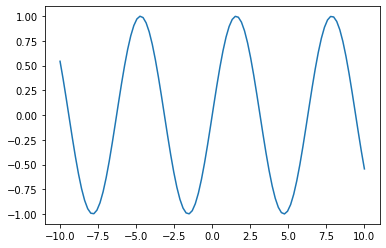

In [16]:
x = np.linspace(-10, 10, 100)
y = np.sin(x)
plt.plot(x, y)

#### iris数据集的可视化

In [17]:
from sklearn import datasets

In [18]:
iris_data = datasets.load_iris()

In [19]:
iris_data["data"][:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [20]:
iris_data["target"][:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

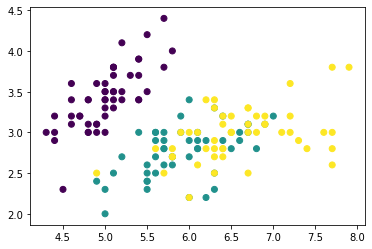

In [21]:
plt.scatter(
    # 第一列
    iris_data["data"][:, 0], 
    # 第二列
    iris_data["data"][:, 1], 
    # 颜色用target
    c=iris_data["target"]
)

#### 4. Sklearn

In [22]:
# 只用前两列特征
X = iris_data.data[:, :2]
Y = iris_data.target

In [23]:
# 线性回归经常作为基准模型作为对比
from sklearn.linear_model import LogisticRegression
# 构建对象
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
# 训练
logreg.fit(X, Y)
# 评估效果
logreg.score(X, Y)

0.82

In [24]:
# 传统机器学习非常好用的GBDT
from sklearn.ensemble import GradientBoostingClassifier
# 构建对象
clf = GradientBoostingClassifier()
# 训练
clf.fit(X, Y)
# 评估效果
clf.score(X, Y)

0.92